In [1]:
import numpy as np 
import xarray as xr

### open air temp tutorial dataset 

In [2]:
airds = xr.tutorial.load_dataset('air_temperature')

### sort by latitude, unless wrong, coordinates must be increasing in Grads

In [3]:
airds = airds.sortby('lat')

In [4]:
airds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 15.0 17.5 20.0 22.5 25.0 ... 67.5 70.0 72.5 75.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 296.3 296.8 297.1 ... 241.5 241.8
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### quick plot for first time step 

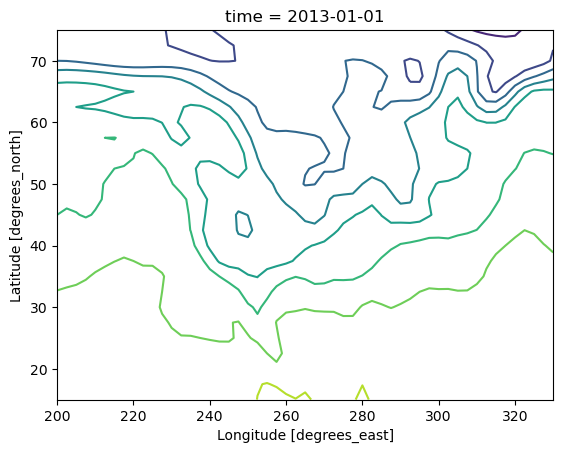

In [5]:
airds['air'].isel(time=0).plot.contour(levels=10)

### get the data 

In [6]:
data = airds['air'].values

In [7]:
type(data)

numpy.ndarray

In [8]:
data.shape

(2920, 25, 53)

### filename (binary)

In [9]:
filename = 'air.grd'

### save to file

In [10]:
data.astype('float32').tofile(filename)

### get the coordinates 

In [11]:
lon = airds.lon.values 
lat = airds.lat.values
time = airds.time.to_index()

### write the control file 

In [12]:
with open(filename.replace('.grd','.ctl'), 'w') as f:
    f.write(f"DSET ^{filename}\n")
    f.write("TITLE Converted from NetCDF\n")
    f.write("UNDEF -9.99e+33\n")
    f.write(f"XDEF {len(lon)} LINEAR {lon[0]} {(lon[1]-lon[0])}\n")
    f.write(f"YDEF {len(lat)} LINEAR {lat[0]} {(lat[1]-lat[0])}\n")
    f.write(f"ZDEF 1 LEVELS 1\n")
    f.write(f"TDEF {len(time)} LINEAR {time[0].strftime('%H:%MZ%d%b%Y')} 6hr\n")
    f.write(f"VARS 1\nair 100 500 air\nENDVARS\n")

[]('./grads.png')

### grads code below 

![grads](grads.png)

### grads output below 

![grads display](grads_display.png)